In [1]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123875 sha256=5dd109c3f9aee6a53335260713c3fc592fe2b72bcc0ef538bd343651ceec5c3c
  Stored in directory: /tmp/pip-ephem-wheel-cache-t1mfq8on/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt
import straph.betweenness as bt
import numpy

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

In [3]:
nb_erdos = 10

In [4]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos"+str(nb_erdos)+"_nodes.sg",
                      path_links=path_directory + "erdos"+ str(nb_erdos)+ "_links.sg")
S.describe()

Nb of Nodes :  15
Nb of segmented nodes :  15.0
Nb of links :  48
Nb of segmented links :  78.0
Nb of event times :  63


In [5]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


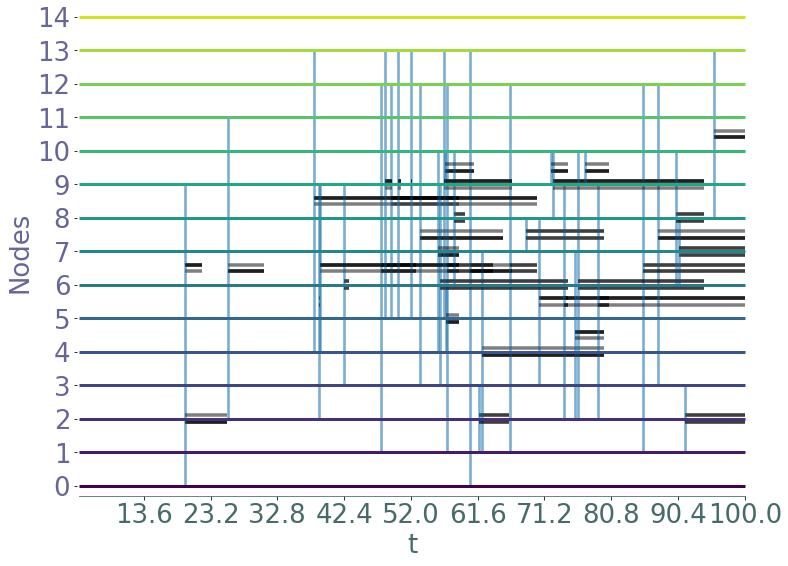

In [6]:
S.plot()

In [7]:
SS = S.stream_graph_to_link_stream()

In [8]:
SS.write_to_matthieu_link_stream("erdos" + str(nb_erdos))

In [9]:
betweenness, general_contri, nouveau, events, sigma_r, latency, prev_next , contri, before, after, deltasvvt, no_succ ,features = bt.betweenness_all(SS)

In [10]:
import os
cmd = 'mv erdos'+str(nb_erdos)+'_mat.ls archive_code/Test'
os.system(cmd)

0

In [11]:
sigma_r[0][(1,23.863822474044515)]

KeyError: (1, 23.863822474044515)

In [12]:
import os
check_exec = 0
for v in SS.nodes:
    for w in SS.nodes:
        if v !=w:
            for x,y,z in latency[v][w]:
                cmd = 'python2 archive_code/vsp.py ' + str(x) + ' ' + str(v) + ' ' + str(y) + ' ' + str(w) +' Test/erdos'+str(nb_erdos)+'_mat.ls lol'
                res_exec = os.system(cmd)
                check_exec += res_exec
                #print(cmd)
                sigmar_mat = bt.read_dictionary("archive_code/lol_vsp.pic")
                #print(sigmar_mat,sigma_r[v][(w,y)])
                if sigma_r[v][(w,y)].val != sigmar_mat[(str(v),x,str(w),y)][0]:
                    print("problem",sigma_r[v][(w,y)],sigmar_mat[(str(v),x,str(w),y)])
print(res_exec)

problem vol(220.113336950813,6) (220.11333695081302, 6)
problem vol(9.32428935431267,4) (9.324289354312672, 4)
problem vol(2.780133291622621,2) (2.7801332916226213, 2)
problem vol(15.125682753677092,3) (15.12568275367709, 3)
problem vol(13.063971816960255,2) (13.063971816960253, 2)
problem vol(15.125682753677092,3) (15.12568275367709, 3)
problem vol(0.048229145192212435,5) (0.04822914519221244, 5)
problem vol(0.0020356237059467497,5) (0.00203562370594675, 5)
problem vol(25.664837053619202,2) (25.664837053619205, 2)
problem vol(25.664837053619202,2) (25.664837053619205, 2)
problem vol(0.551276494479228,3) (0.5512764944792279, 3)
problem vol(31.900361696927384,4) (31.90036169692738, 4)
problem vol(14.083462362285355,4) (14.083462362285356, 4)
problem vol(220.113336950813,6) (220.11333695081302, 6)
problem vol(9.32428935431267,4) (9.324289354312672, 4)
0
